# Elastic Net Example

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from elastic_net import ElasticNet

In [2]:
# Generate sample data
X, y = make_regression(n_samples=100, n_features=20, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [3]:
# Train Elastic Net model
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_train_scaled, y_train)

# Make predictions
y_pred = elastic_net.predict(X_test_scaled)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean squared error: {mse:.2f}")
print(f"R-squared score: {r2:.2f}")

# Check for NaN values
if np.isnan(y_pred).any():
    print("Warning: NaN values in predictions")
else:
    print("No NaN values in predictions")

Mean squared error: 0.03
R-squared score: 1.00
No NaN values in predictions


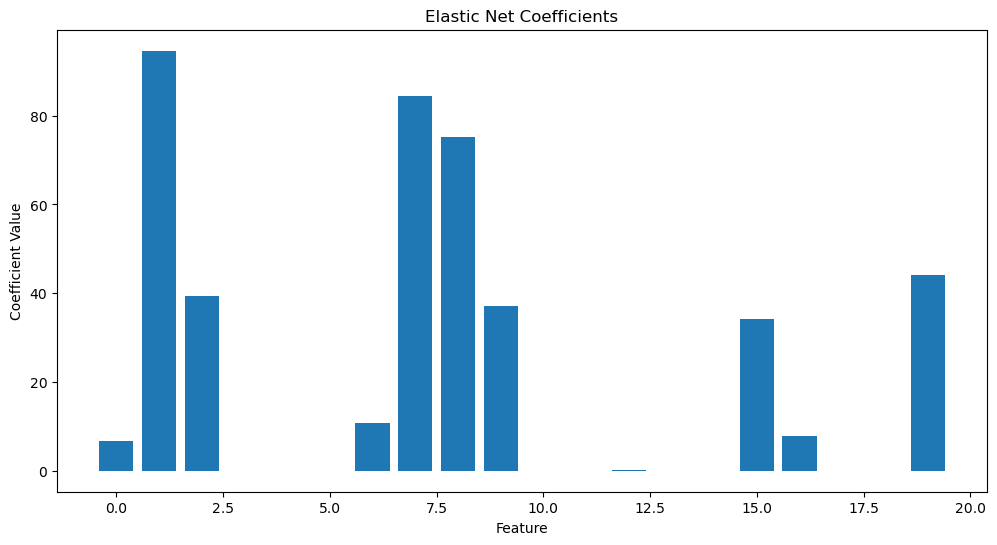

In [4]:
# Visualize coefficients
plt.figure(figsize=(12, 6))
plt.bar(range(len(elastic_net.coef_)), elastic_net.coef_)
plt.title("Elastic Net Coefficients")
plt.xlabel("Feature")
plt.ylabel("Coefficient Value")
plt.show()

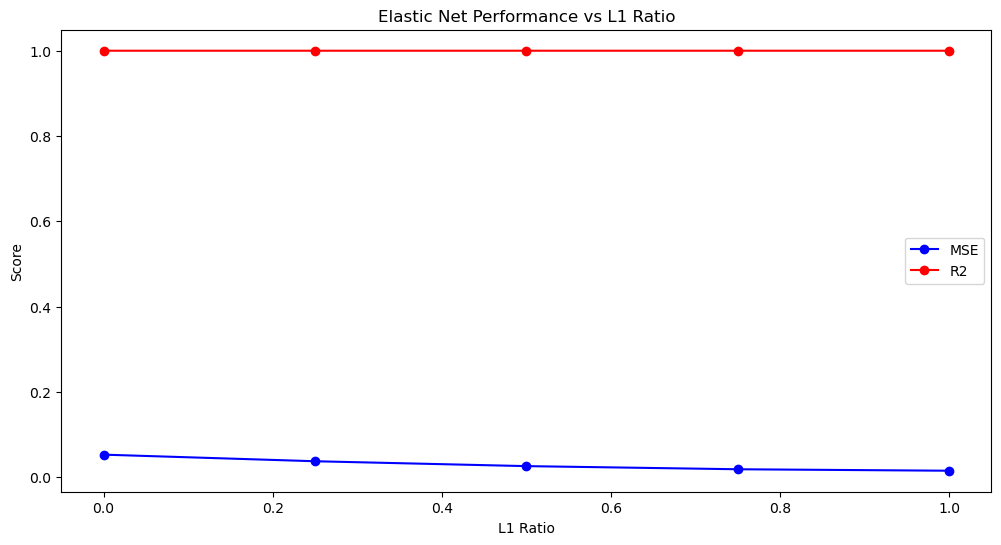

In [5]:
# Compare different l1_ratio values
l1_ratios = [0, 0.25, 0.5, 0.75, 1]
mse_scores = []
r2_scores = []

for l1_ratio in l1_ratios:
    model = ElasticNet(alpha=0.1, l1_ratio=l1_ratio)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse_scores.append(mean_squared_error(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))

plt.figure(figsize=(12, 6))
plt.plot(l1_ratios, mse_scores, 'bo-', label='MSE')
plt.plot(l1_ratios, r2_scores, 'ro-', label='R2')
plt.title("Elastic Net Performance vs L1 Ratio")
plt.xlabel("L1 Ratio")
plt.ylabel("Score")
plt.legend()
plt.show()

Sklearn ElasticNet Results:
Mean squared error: 45.72
R-squared score: 1.00


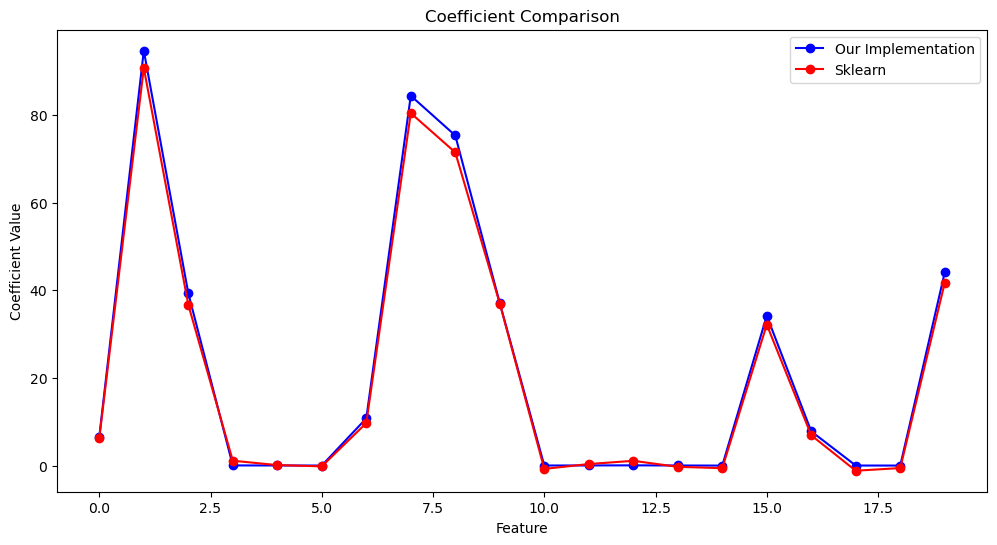

In [6]:
# Compare with sklearn's ElasticNet
from sklearn.linear_model import ElasticNet as SKElasticNet

sk_elastic_net = SKElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
sk_elastic_net.fit(X_train_scaled, y_train)
sk_y_pred = sk_elastic_net.predict(X_test_scaled)

sk_mse = mean_squared_error(y_test, sk_y_pred)
sk_r2 = r2_score(y_test, sk_y_pred)

print("Sklearn ElasticNet Results:")
print(f"Mean squared error: {sk_mse:.2f}")
print(f"R-squared score: {sk_r2:.2f}")

# Compare coefficients
plt.figure(figsize=(12, 6))
plt.plot(elastic_net.coef_, 'bo-', label='Our Implementation')
plt.plot(sk_elastic_net.coef_, 'ro-', label='Sklearn')
plt.title("Coefficient Comparison")
plt.xlabel("Feature")
plt.ylabel("Coefficient Value")
plt.legend()
plt.show()